In [ ]:
!pip install pandas openpyxl 

In [ ]:
import pandas as pd

# Specify the file path
file_path = r'C:\Bird_Monitoring_Data_GRASSLAND.XLSX'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(df.head())

In [ ]:
df["Admin_Unit_Code"].unique

In [3]:
import numpy as np
df['AcceptedTSN'] = df['AcceptedTSN'].replace("NaN", np.nan)  # Replace empty strings with NaN
df['AcceptedTSN'] = df['AcceptedTSN'].fillna(997805)       # Replace NaN with your value


In [ ]:
print(df.isnull().sum())  # Should print 0


#Distance

In [5]:
df.Distance.unique()

array(['50 - 100 Meters', '<= 50 Meters', nan], dtype=object)

In [28]:
# Count occurrences of each unique value, including NaN
counts_with_nan = df['Distance'].value_counts(dropna=False)

print(counts_with_nan)


Distance
50 - 100 Meters    1776
<= 50 Meters       1482
NaN                 330
Name: count, dtype: int64


In [6]:
mode_value = df['Distance'].mode()[0]
df['Distance'] = df['Distance'].fillna(mode_value)

In [7]:
df.Distance.isnull().sum()

np.int64(0)

                                                 #outliers#

In [ ]:
print(df.dtypes)

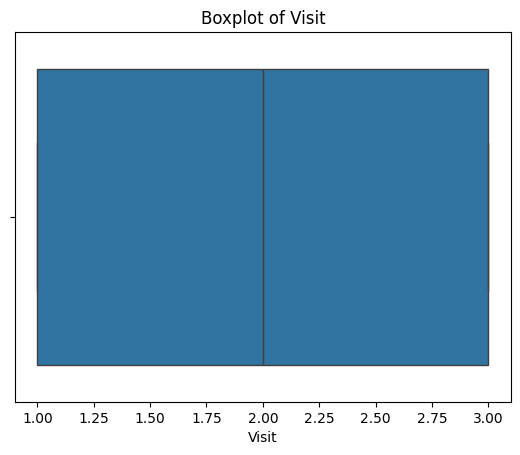

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for a single column
sns.boxplot(data=df, x='Visit')

# Add labels
plt.title('Boxplot of Visit')
plt.xlabel('Visit')

# Show the plot
plt.show()


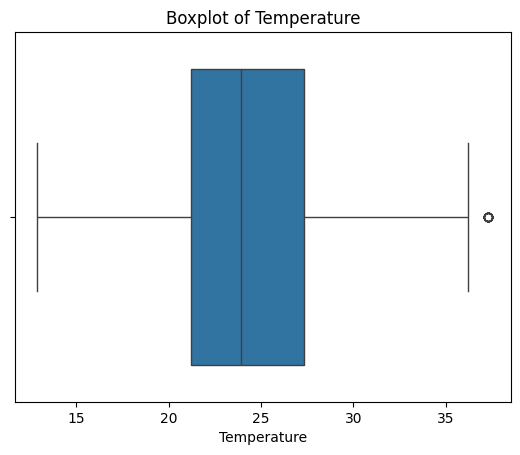

In [23]:

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for a single column
sns.boxplot(data=df, x='Temperature')

# Add labels
plt.title('Boxplot of Temperature')
plt.xlabel('Temperature')

# Show the plot
plt.show()



In [ ]:
import numpy as np

# Select the column to check for outliers
column = df['Temperature']

# Calculate Q1, Q3, and IQR
Q1 = column.quantile(0.25)
Q3 = column.quantile(0.75)
IQR = Q3 - Q1

# Define the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = column[(column < lower_bound) | (column > upper_bound)]
print(f"Outliers:\n{outliers}")



In [3]:
df.Distance.isnull().sum()

np.int64(330)

In [ ]:
import numpy as np

# Select the column to check for outliers
column = df['Temperature']

# Calculate Q1, Q3, and IQR
Q1 = column.quantile(0.25)
Q3 = column.quantile(0.75)
IQR = Q3 - Q1

# Define the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['Temperature_capped'] = column.clip(lower=lower_bound, upper=upper_bound)

# Display the modified column
print(df[['Temperature', 'Temperature_capped']])


In [9]:
df.drop("Temperature",axis=1,inplace=True)

In [ ]:
df.columns

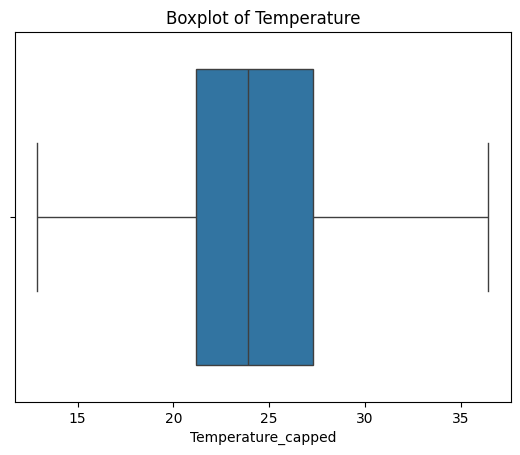

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for a single column
sns.boxplot(data=df, x='Temperature_capped')

# Add labels
plt.title('Boxplot of Temperature')
plt.xlabel('Temperature_capped')

# Show the plot
plt.show()



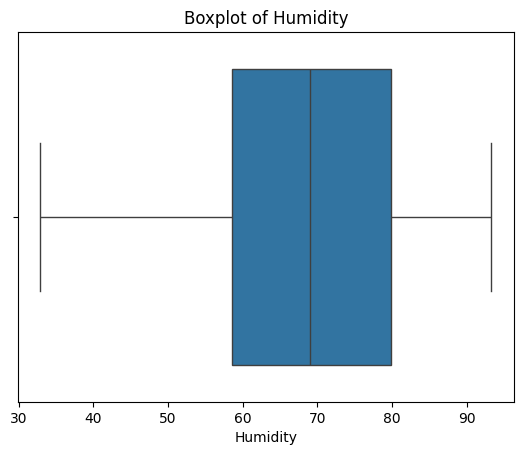

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for a single column
sns.boxplot(data=df, x='Humidity')

# Add labels
plt.title('Boxplot of Humidity')
plt.xlabel('Humidity')

# Show the plot
plt.show()



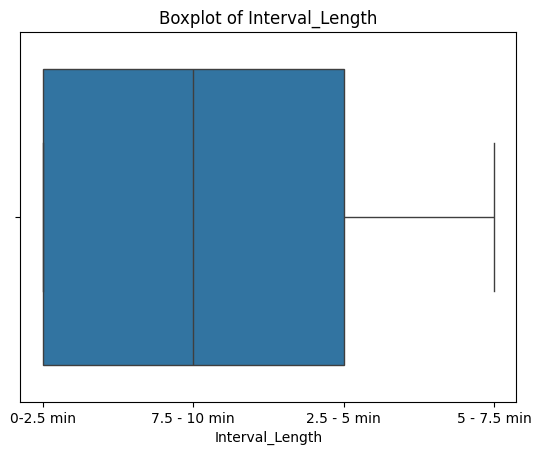

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for a single column
sns.boxplot(data=df, x='Interval_Length')

# Add labels
plt.title('Boxplot of Interval_Length')
plt.xlabel('Interval_Length')

# Show the plot
plt.show()



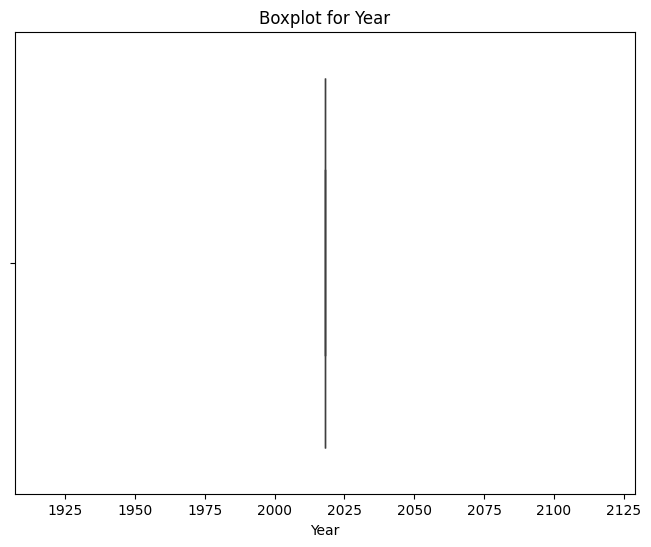

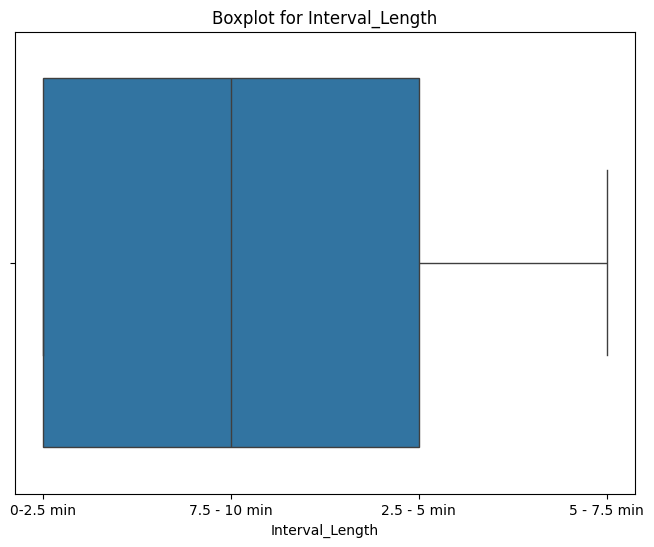

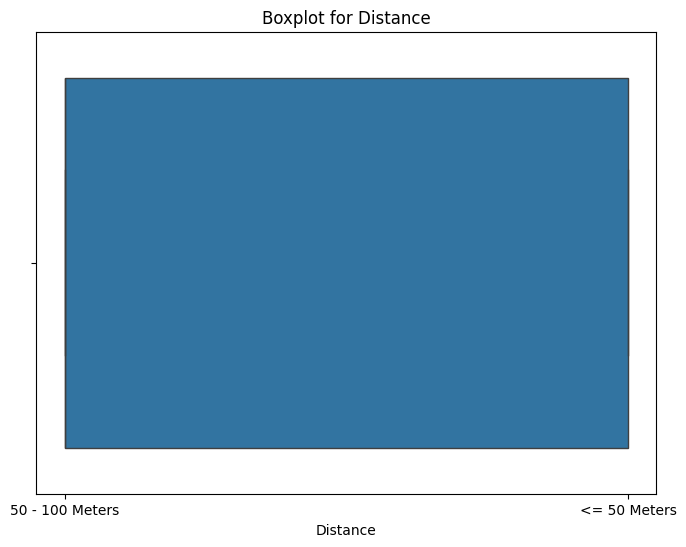

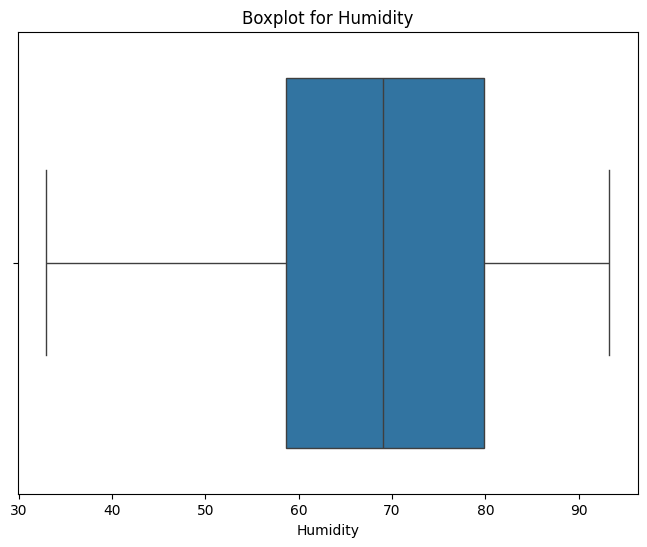

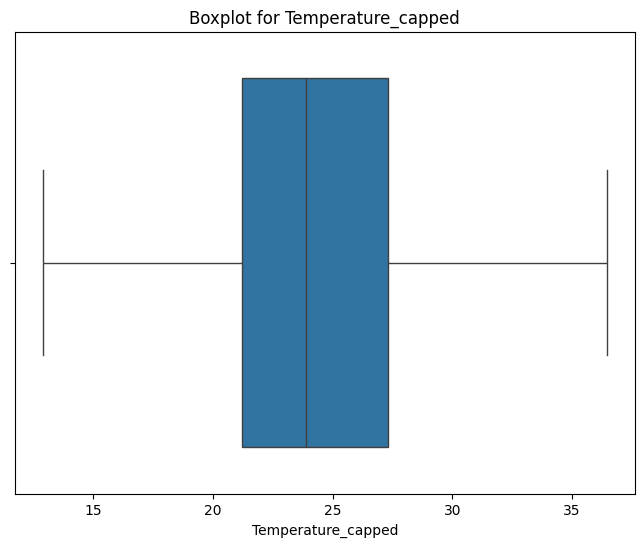

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df
numerical_columns = ['Year', 'Interval_Length', 'Distance', 'Humidity', 'Temperature_capped']

# Create boxplots
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot for {col}')
    plt.show()


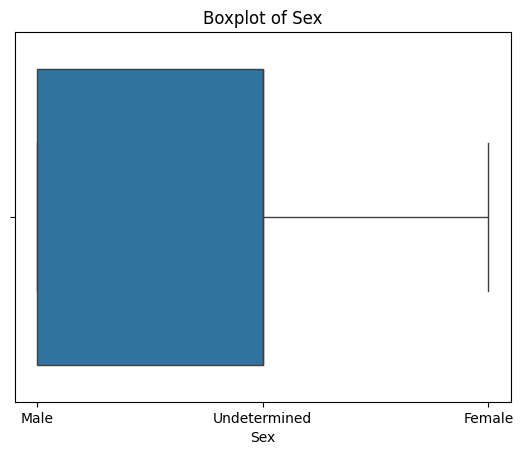

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for a single column
sns.boxplot(data=df, x='Sex')

# Add labels
plt.title('Boxplot of Sex')
plt.xlabel('Sex')

# Show the plot
plt.show()


In [23]:
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")


Total duplicate rows: 458


In [28]:
df_cleaned = df.drop_duplicates()



In [29]:
duplicate_count = df_cleaned.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 0


In [31]:
df1=df_cleaned

In [33]:
df1.columns

Index(['Admin_Unit_Code', 'Sub_Unit_Code', 'Plot_Name', 'Location_Type',
       'Year', 'Date', 'Start_Time', 'End_Time', 'Observer', 'Visit',
       'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 'Sex',
       'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'TaxonCode',
       'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status',
       'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance',
       'Previously_Obs', 'Initial_Three_Min_Cnt'],
      dtype='object')

In [ ]:
df1.dtypes

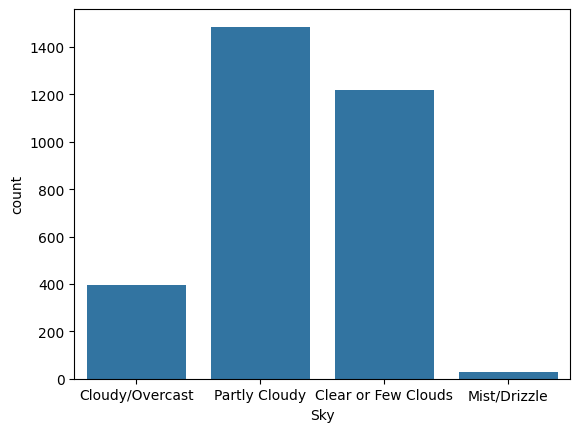

In [41]:
sns.countplot(data=df1, x='Sky')
plt.show()


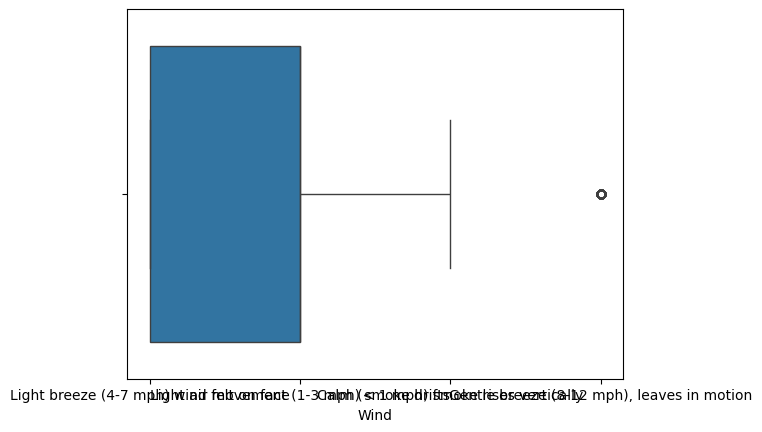

In [46]:
sns.boxplot(data=df1,x='Wind')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Select the column to check for outliers
column = df1['Wind']

# Calculate Q1, Q3, and IQR
Q1 = column.quantile(0.25)
Q3 = column.quantile(0.75)
IQR = Q3 - Q1

# Define the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = column[(column < lower_bound) | (column > upper_bound)]
print(f"Outliers:\n{outliers}")


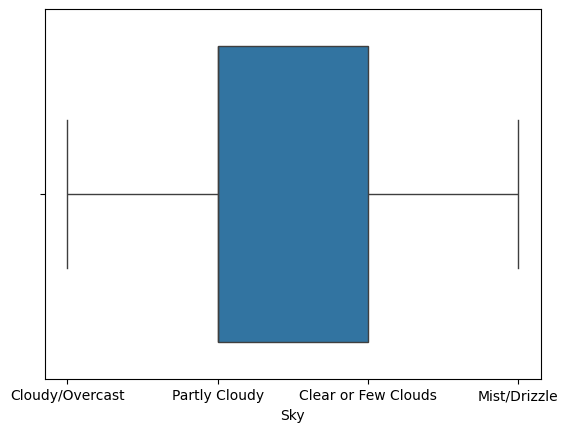

In [42]:
sns.boxplot(data=df1,x="Sky")
plt.show()

In [43]:
# Frequency distribution of categories in the 'Sky' column
sky_counts = df['Sky'].value_counts()

# Print rare categories
rare= sky_counts[sky_counts < sky_counts.mean() / 2]  # Define a threshold
print("Rare Categories (Potential Outliers):")
print(rare)


Rare Categories (Potential Outliers):
Sky
Cloudy/Overcast    447
Mist/Drizzle        40
Name: count, dtype: int64


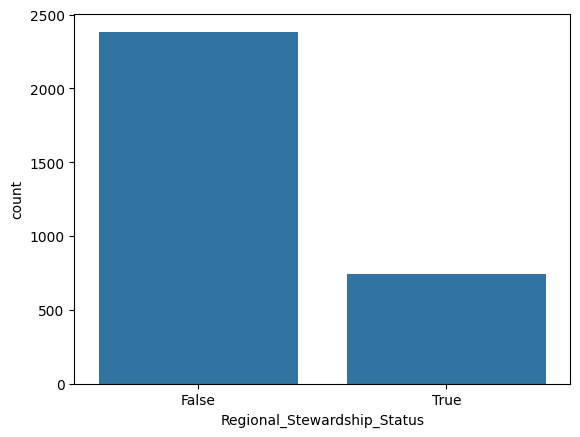

In [39]:
sns.countplot(data=df1, x='Regional_Stewardship_Status')
plt.show()


In [59]:
df1.isnull().sum()

Admin_Unit_Code                0
Plot_Name                      0
Location_Type                  0
Year                           0
Date                           0
Start_Time                     0
End_Time                       0
Observer                       0
Visit                          0
Interval_Length                0
ID_Method                      1
Distance                       0
Flyover_Observed               0
Sex                            0
Common_Name                    0
Scientific_Name                0
AcceptedTSN                    0
TaxonCode                      1
AOU_Code                       0
PIF_Watchlist_Status           0
Regional_Stewardship_Status    0
Temperature                    0
Humidity                       0
Sky                            0
Wind                           0
Disturbance                    0
Previously_Obs                 0
Initial_Three_Min_Cnt          0
dtype: int64

In [ ]:
df1 = df1.drop(['Sub_Unit_Code'], axis=1)


In [62]:
df1["Admin_Unit_Code"].unique()

array(['ANTI'], dtype=object)